In [23]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Flipping Out

In [24]:
def flip_coin():
    return random.randint(1,2)

In [25]:

def flip_multiple(n=16):
    heads = 0
    tails = 0
    num_of_flips = 0
    list_of_flips = []
    for i in range(2**n):
        result = flip_coin()
        num_of_flips += 1
        if result == 1:
            heads += 1
        else:    
            tails += 1
        for i in range(n):
            if num_of_flips == 2**i:
                list_of_flips.append((heads, tails))
    return list_of_flips

flip_multiple()

[(1, 0),
 (2, 0),
 (3, 1),
 (5, 3),
 (11, 5),
 (19, 13),
 (36, 28),
 (60, 68),
 (125, 131),
 (251, 261),
 (500, 524),
 (997, 1051),
 (1997, 2099),
 (4086, 4106),
 (8213, 8171),
 (16371, 16397)]

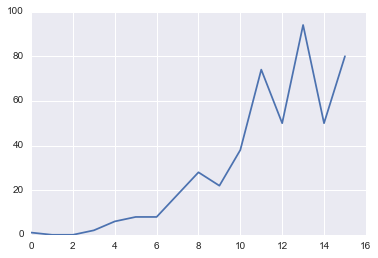

In [26]:
differences = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    differences.append(math.fabs(heads - tails))

plt.plot(differences)
plt.show()

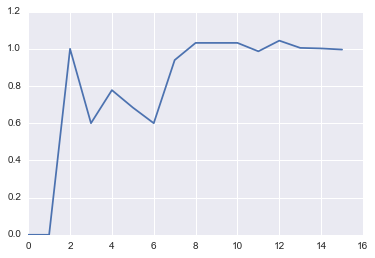

In [27]:
ratios = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    try:
        ratios.append(heads / tails)
    except ZeroDivisionError:
        ratios.append(0)

plt.plot(ratios)
plt.show()

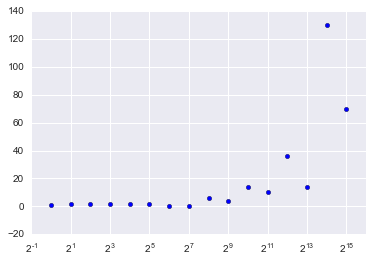

In [30]:
differences = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    differences.append(math.fabs(heads - tails))

x_values = []
for num in range(len(differences)):
    x_values.append(2**num)
    
plt.scatter(x_values, differences)
plt.xscale('log', basex=2)
plt.show()

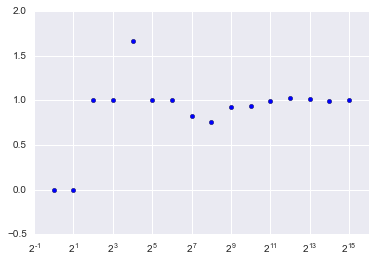

In [31]:
ratios = []
list_of_tuples = flip_multiple()
for heads, tails in list_of_tuples:
    try:
        ratios.append(heads / tails)
    except ZeroDivisionError:
        ratios.append(0)

plt.scatter(x_values, ratios)
plt.xscale('log', basex=2)
plt.show()